<center>

<image src = 'data/main_project_image.jpg'>

</center>

# Чтение и работа с данными

Импортируем библиотеки которые понадобятся нам по ходу работы:

In [126]:
# Чтение и работа с данными
import pandas as pd
import numpy as np

# Визуализация данных
import matplotlib.pyplot as plt
import seaborn as sns

# «Скалирование» данных
from sklearn.preprocessing import StandardScaler

# Разбиение данных на выборки
from sklearn.model_selection import train_test_split

# SVM-модель с ядром RBF
from sklearn.svm import SVC

# Метрика оценки качества моделей
from sklearn.metrics import accuracy_score

# Подбор гиперпараметров модели
from sklearn.model_selection import RandomizedSearchCV

# Кросс валидация
from sklearn.model_selection import StratifiedShuffleSplit

# Игнорирование предупреждений
import warnings
warnings.filterwarnings('ignore')

# Визуальная настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

Прочитаем имеющийся датасет:

In [127]:
# Читаем данные
wine_data = pd.read_csv('data/winequality-red.zip', sep=';')

# Выводим первые пять строк
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Обязательно проверим данные на наличие пропусков:

In [128]:
# Проверяем столбцы на наличие пропусков
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Пропусков нет, можно переходить к предварительной оценке имеющихся данных.

Посмотрим на статистическую характеристику наших данных:

In [129]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Оценивая всё большинство признаков описывающих вина и их категории качества, мы можем сделать выводы о необходимости в обязательном «скалировании» (стандартизации) будущих предикторов в виду большого разнообразия разброса значений и кодировке целевой переменной перед их подачей для обучения модели.

Проводить данные шаги мы будем на этапе подготовки данных к обучению, а сейчас оценим влияние каждого из признаков на оценку качества вина их взаимосвязь.

# Визуальный анализ данных

Этап визуализации взаимосвязей имеющихся признаков вина и его качества разделим на два тематических подэтапа с «говорящими» названиями.

## Оценка влияния факторов на качество вина

### Кислотность

Посмотрим на влияние уровня кислотностей на оценку качества наших вин.

Для этого мы:

1. Сгруппируем средние значения уровня кислотностей с по целевой переменной (столбцу `'quality'`).

2. Преобразуем найденные значения в формат *Dataframe* для удобства их передачи при визуализации.

3. Сбросим значения индекса (целевого столбца) для его передачи при визуализации.

4. Визуализируем полученные средние значения и сделаем на их основе выводы.

Всё последующие сравнения влияний также будут проходить этапы приведённые выше, поэтому мы опустим постоянное напоминание о шагах в будущем. 

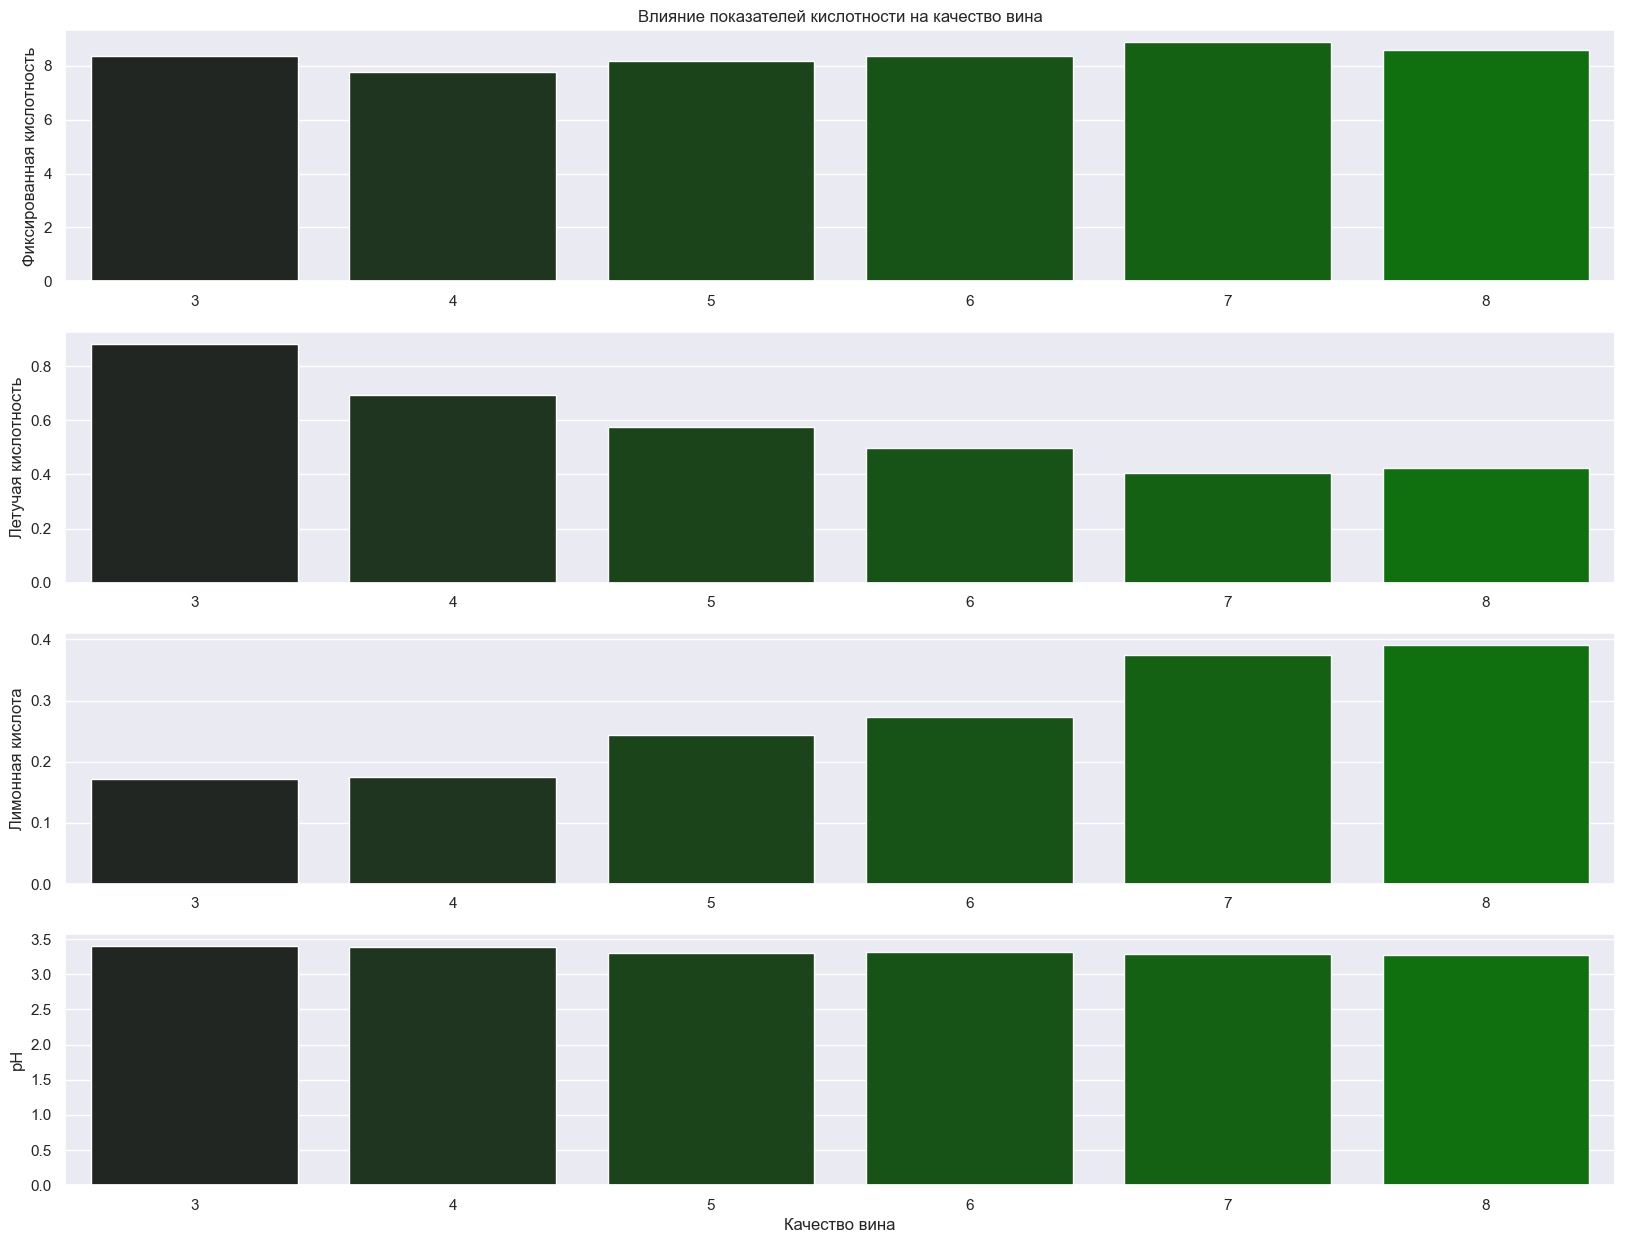

In [130]:
# 1. Создаём датасеты для каждого из признаков кислотностей
wine_fixed_acidity = wine_data.groupby('quality')['fixed acidity'].mean().to_frame().reset_index() # 2-3 Находим средние значения по столбцу и сбрасываем индексы
wine_volatile_acidity = wine_data.groupby('quality')['volatile acidity'].mean().to_frame().reset_index()
wine_citric_acid = wine_data.groupby('quality')['citric acid'].mean().to_frame().reset_index()
wine_pH = wine_data.groupby('quality')['pH'].mean().to_frame().reset_index()

# 4. Визуализируем полученные результаты
fig, axes = plt.subplots(4, 1, figsize=(20, 15))

# Фиксированный показатель кислотности
fixed_acidity_bar_plot = sns.barplot(data=wine_fixed_acidity,
                         x='quality',
                         y='fixed acidity',
                         hue='quality',
                         palette='dark:green',
                         legend=False,
                         ax=axes[0])

fixed_acidity_bar_plot.set(xlabel='', ylabel='Фиксированная кислотность')
fixed_acidity_bar_plot.set_title('Влияние показателей кислотности на качество вина')

# Летучая кислотность
volatile_acidity_bar_plot = sns.barplot(data=wine_volatile_acidity,
                         x='quality',
                         y='volatile acidity',
                         hue='quality',
                         palette='dark:green',
                         legend=False,
                         ax=axes[1])

volatile_acidity_bar_plot.set(xlabel='', ylabel='Летучая кислотность')

# Лимонная кислота
citric_acid_bar_plot = sns.barplot(data=wine_citric_acid,
                         x='quality',
                         y='citric acid',
                         hue='quality',
                         palette='dark:green',
                         legend=False,
                         ax=axes[2])

citric_acid_bar_plot.set(xlabel='', ylabel='Лимонная кислота')

# Показатель меры кислотности или щелочности жидкой среды
pH_bar_plot = sns.barplot(data=wine_pH,
                         x='quality',
                         y='pH',
                         hue='quality',
                         palette='dark:green',
                         legend=False,
                         ax=axes[3])

pH_bar_plot.set(xlabel='Качество вина', ylabel='pH');

Посмотрим на более подробные значения признаков и фактор оценки вина:

In [131]:
# Фиксированный показатель кислотности
wine_fixed_acidity.sort_values('quality', ascending=False)

,quality,fixed acidity
5,8,8.566667
4,7,8.872362
3,6,8.347179
2,5,8.167254
1,4,7.779245
0,3,8.360000


In [132]:
# Летучая кислотность
wine_volatile_acidity.sort_values('quality', ascending=False)

,quality,volatile acidity
5,8,0.423333
4,7,0.403920
3,6,0.497484
2,5,0.577041
1,4,0.693962
0,3,0.884500


In [133]:
# Лимонная кислота
wine_citric_acid.sort_values('quality', ascending=False)

,quality,citric acid
5,8,0.391111
4,7,0.375176
3,6,0.273824
2,5,0.243686
1,4,0.174151
0,3,0.171000


In [134]:
# Показатель меры кислотности или щелочности жидкой среды
wine_pH.sort_values('quality', ascending=False)

,quality,pH
5,8,3.267222
4,7,3.290754
3,6,3.318072
2,5,3.304949
1,4,3.381509
0,3,3.398000


Из оценки уровней кислотности их влияния на качество вина мы можем сделать следующие выводы:

* Мы не можем сказать наверняка есть ли прямое влияние фиксированного показателя кислотности (столбец `'fixed acidity'`) на качество вина. При увеличении или уменьшении показателя качество самого вина может быть как заметно лучше (как в случае с качеством 4 и 8), так и сильно хуже (всё те же средние значения для категорий 8 и 4 только наоборот). Возможно этот признак коррелирует с другими показателями кислотности больше, чем с целевой переменной.

* В случае с признаком летучей кислотности (столбец `'volatile acidity'`) ситуация ровно противоположная — с уменьшением показателя качество вина становиться только лучше, за исключением разницы в средних значений для категорий 7 и 8. Такая разница могла возникнуть из-за недостатка в количестве записей для наивысшей категории вин.

* Как и в предыдущем случае, уровень лимонной кислоты в вине (столбец `'citric acid'`) прямо влияет на его качество — увеличение показателя даёт лучшую оценку и наоборот, в этот раз без исключений.

* Признак характеризующий показатель меры кислотности (столбец `'pH'`) так же оказывает положительное влияние при уменьшении среднего значения на качество оценки вина.

Таким образом, 3 из 4 оценённых нами фактора оказывают положительное или отрицательное влияние на оценку вина. Для более полной картины необходимо будет воспользоваться матрицей корреляции наших признаков с целевой переменной и между собой.

### Сахар и хлориды

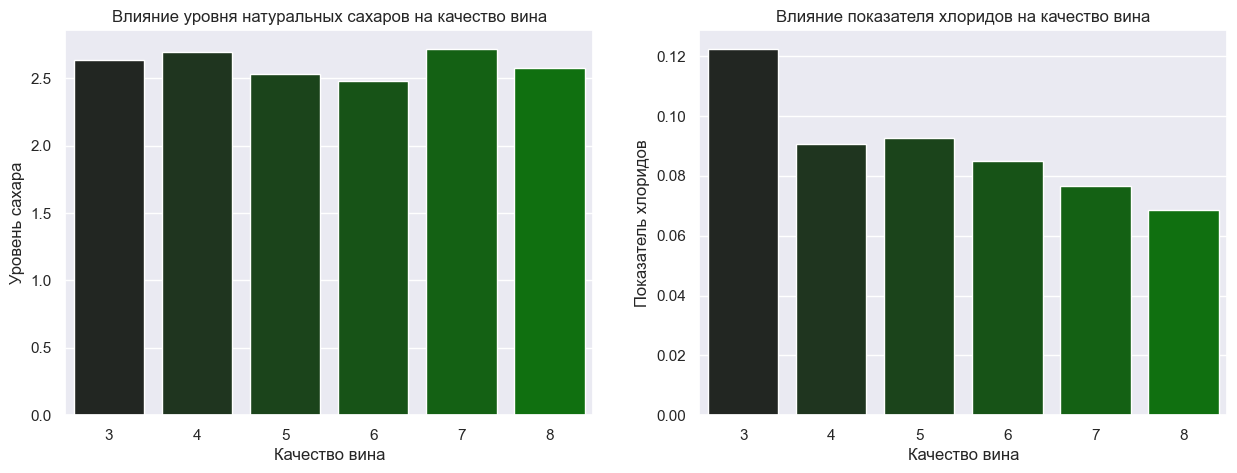

In [135]:
# Создаём группировки по необходимым столбцам
wine_residual_sugar = wine_data.groupby('quality')['residual sugar'].mean().to_frame().reset_index()
wine_chlorides = wine_data.groupby('quality')['chlorides'].mean().to_frame().reset_index()

# Визуализируем результаты
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Уровень натуральных сахаров
wine_residual_sugar_bar_plot = sns.barplot(data=wine_residual_sugar,
                                           x='quality',
                                           y='residual sugar',
                                           hue='quality',
                                           palette='dark:green',
                                           legend=False,
                                           ax=axes[0])

wine_residual_sugar_bar_plot.set(xlabel='Качество вина', ylabel='Уровень сахара')
wine_residual_sugar_bar_plot.set_title('Влияние уровня натуральных сахаров на качество вина')

# Показатель хлоридов
wine_chlorides_bar_plot = sns.barplot(data=wine_chlorides,
                                           x='quality',
                                           y='chlorides',
                                           hue='quality',
                                           palette='dark:green',
                                           legend=False,
                                           ax=axes[1])

wine_chlorides_bar_plot.set(xlabel='Качество вина', ylabel='Показатель хлоридов')
wine_chlorides_bar_plot.set_title('Влияние показателя хлоридов на качество вина');

Посмотрим на более подробные значения признаков и фактор оценки вина:

In [89]:
# Уровень натуральных сахаров
wine_residual_sugar.sort_values('quality', ascending=False)

,quality,residual sugar
5,8,2.577778
4,7,2.720603
3,6,2.477194
2,5,2.528855
1,4,2.694340
0,3,2.635000


In [90]:
# Показатель хлоридов
wine_chlorides.sort_values('quality', ascending=False)

,quality,chlorides
5,8,0.068444
4,7,0.076588
3,6,0.084956
2,5,0.092736
1,4,0.090679
0,3,0.122500


На основе двух оценённых признаков мы можем прийти в выводу, что:

* Уровень натуральных сахаров (признак `'residual sugar'`) в вине не оказывает прямого положительного или отрицательного влияния на его категорию качества.

* Показатель же хлоридов (признак `'chlorides'`) наоборот, имеет явную связь с качеством вина — при уменьшении среднего значения качество вина становиться лучше, что прекрасно заметно при сравнении значений для наивысшей и наинизшей категорией (категории 8 и 3 соответственно).

### Диоксиды

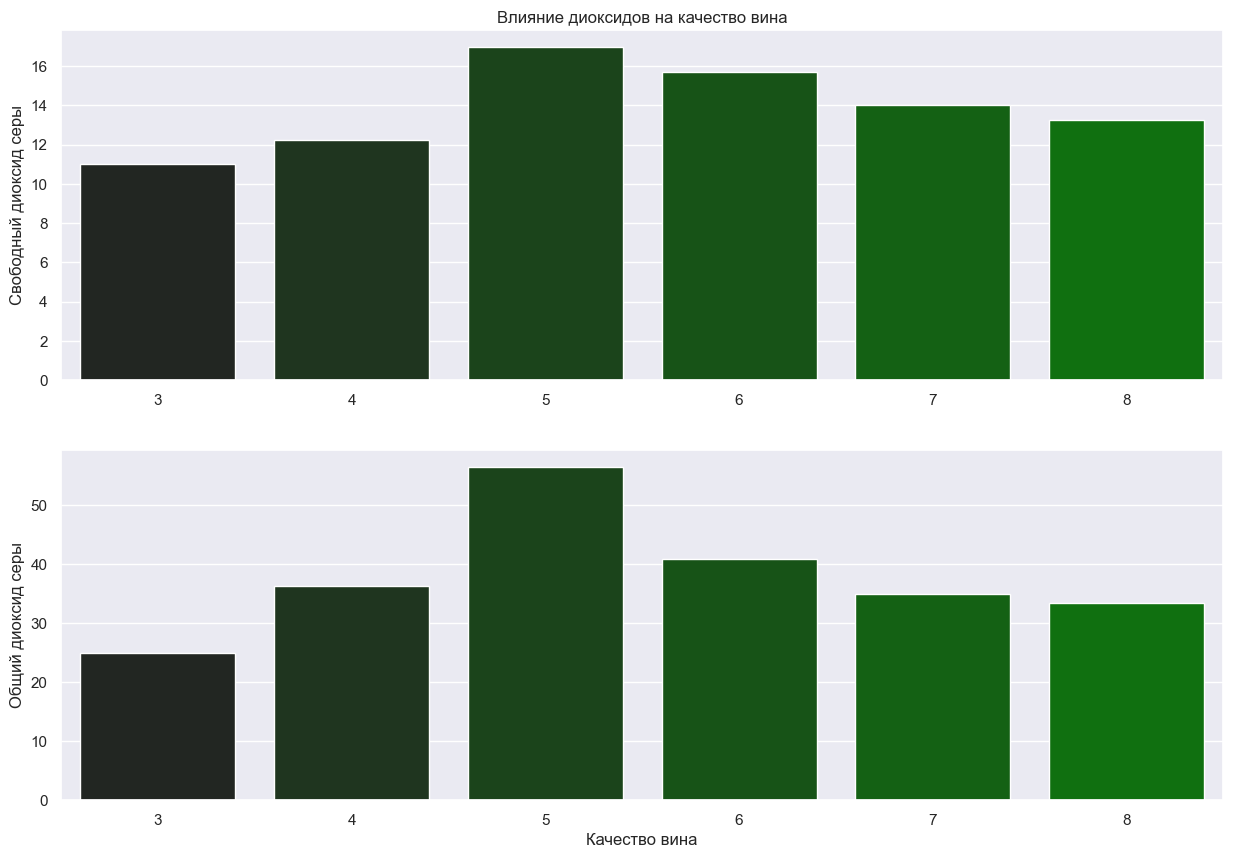

In [91]:
# Создаём группировки по необходимым столбцам
wine_free_sulfur_dioxide = wine_data.groupby('quality')['free sulfur dioxide'].mean().to_frame().reset_index()
wine_total_sulfur_dioxide = wine_data.groupby('quality')['total sulfur dioxide'].mean().to_frame().reset_index()

# Визуализируем результаты
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Показатель свободного диоксида серы
wine_free_sulfur_dioxide_bar_plot = sns.barplot(data=wine_free_sulfur_dioxide,
                                                x='quality',
                                                y='free sulfur dioxide',
                                                hue='quality',
                                                palette='dark:green',
                                                legend=False,
                                                ax=axes[0])

wine_free_sulfur_dioxide_bar_plot.set(xlabel='', ylabel='Свободный диоксид серы')
wine_free_sulfur_dioxide_bar_plot.set_title('Влияние диоксидов на качество вина')

# Показатель общего диоксида серы
wine_total_sulfur_dioxide_bar_plot = sns.barplot(data=wine_total_sulfur_dioxide,
                                                x='quality',
                                                y='total sulfur dioxide',
                                                hue='quality',
                                                palette='dark:green',
                                                legend=False,
                                                ax=axes[1])

wine_total_sulfur_dioxide_bar_plot.set(xlabel='Качество вина', ylabel='Общий диоксид серы');

Посмотрим на более подробные значения признаков и фактор оценки вина:

In [92]:
wine_free_sulfur_dioxide.sort_values('quality', ascending=False)

,quality,free sulfur dioxide
5,8,13.277778
4,7,14.045226
3,6,15.711599
2,5,16.983847
1,4,12.264151
0,3,11.000000


In [93]:
wine_total_sulfur_dioxide.sort_values('quality', ascending=False)

,quality,total sulfur dioxide
5,8,33.444444
4,7,35.020101
3,6,40.869906
2,5,56.513950
1,4,36.245283
0,3,24.900000


При оценке показателей диоксидов, мы не можем однозначно сказать, являются ли эти признаками прямым сигналом о качестве вина: 

* С одной стороны, самые низко оценённые вина имеют и самые маленькие показатели свободного и общего уровня диоксида серы (признаки `'free sulfur dioxide'` и `'total sulfur dioxide'`).

* С другой стороны, самые высоко оценённые вина не имеют самые высокие показатели свободного и общего уровня диоксида серы.

Возможно, всё дело в «золотой середине» — если сравнить средние значения по признакам и полученные средние значения с имеющимися для каждой из категорий, мы легко можем прийти к выводу, что так и есть, наивысшие категории вин имеют самые близкие средние значения к «золотой середине» уровня диоксида серы.

### Плотность вина

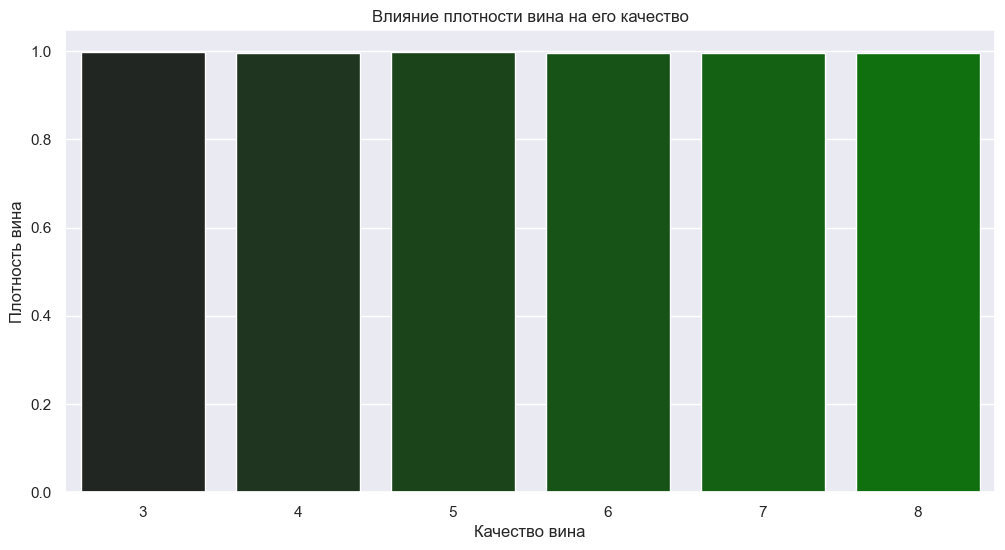

In [94]:
# Создаём группировку по необходимому столбцу
wine_density = wine_data.groupby('quality')['density'].mean().to_frame().reset_index()

# Визуализируем результат
fig = plt.figure(figsize=(12, 6))

wine_density_bar_plot = sns.barplot(data=wine_density,
                                    x='quality',
                                    y='density',
                                    hue='quality',
                                    palette='dark:green',
                                    legend=False)

wine_density_bar_plot.set(xlabel='Качество вина', ylabel='Плотность вина')
wine_density_bar_plot.set_title('Влияние плотности вина на его качество');

Из визуализации средних значений мало что понятно, посмотрим на более подробные значения признака и фактор оценки вина:

In [95]:
wine_density.sort_values('quality', ascending=False)

,quality,density
5,8,0.995212
4,7,0.996104
3,6,0.996615
2,5,0.997104
1,4,0.996542
0,3,0.997464


Теперь, после оценки точных полученных значений стало ясно, что плотность вина (признак `'density'`) также влияет на качество вина, не смотря на то, что казалось бы, показатели разняться в далёких десятитысячных единицах.

### Сульфаты

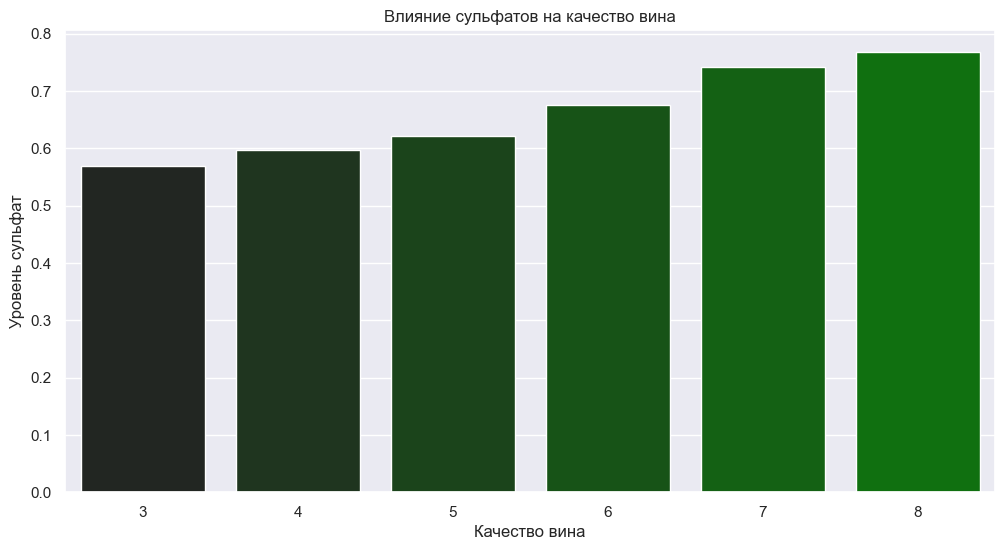

In [96]:
# Создаём группировку по необходимому столбцу
wine_sulphates = wine_data.groupby('quality')['sulphates'].mean().to_frame().reset_index()

# Визуализируем результат
fig = plt.figure(figsize=(12, 6))

wine_sulphates_bar_plot = sns.barplot(data=wine_sulphates,
                                    x='quality',
                                    y='sulphates',
                                    hue='quality',
                                    palette='dark:green',
                                    legend=False)

wine_sulphates_bar_plot.set(xlabel='Качество вина', ylabel='Уровень сульфат')
wine_sulphates_bar_plot.set_title('Влияние сульфатов на качество вина');

Посмотрим на более подробные значения признака и фактор оценки вина:

In [97]:
wine_sulphates.sort_values('quality', ascending=False)

,quality,sulphates
5,8,0.767778
4,7,0.741256
3,6,0.675329
2,5,0.620969
1,4,0.596415
0,3,0.570000


Бесспорно, показатель уровня сульфатов (признак `'sulphates'`) оказывает прямое влияние на вина — как в случае визуализации, так и при анализе точных значений заметно увеличение качества вина с увеличением уровня сульфатов.

### Показатель алкоголя

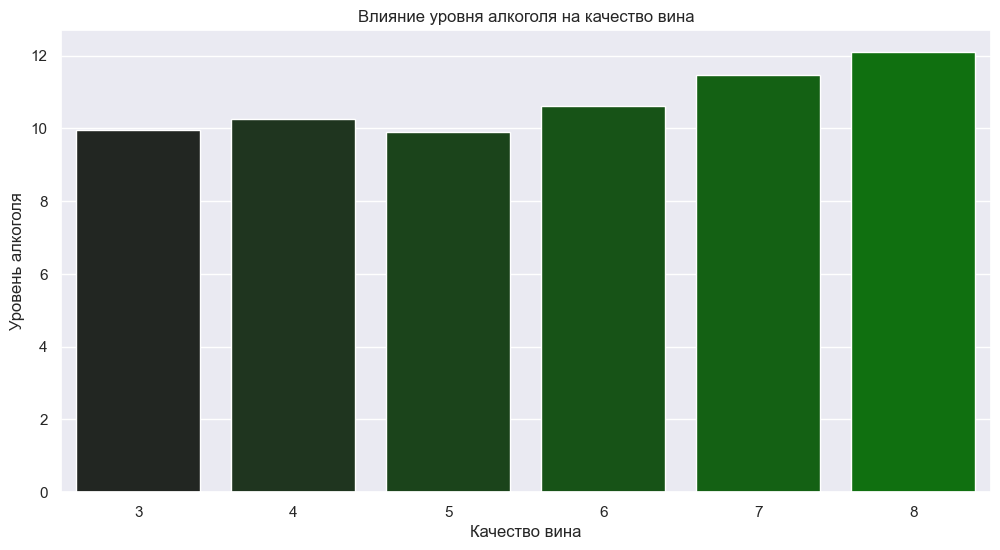

In [98]:
# Создаём группировку по необходимому столбцу
wine_alcohol = wine_data.groupby('quality')['alcohol'].mean().to_frame().reset_index()

# Визуализируем результат
fig = plt.figure(figsize=(12, 6))

wine_alcohol_bar_plot = sns.barplot(data=wine_alcohol,
                                    x='quality',
                                    y='alcohol',
                                    hue='quality',
                                    palette='dark:green',
                                    legend=False)

wine_alcohol_bar_plot.set(xlabel='Качество вина', ylabel='Уровень алкоголя')
wine_alcohol_bar_plot.set_title('Влияние уровня алкоголя на качество вина');

Посмотрим на более подробные значения признака и фактор оценки вина:

In [99]:
wine_alcohol.sort_values('quality', ascending=False)

,quality,alcohol
5,8,12.094444
4,7,11.465913
3,6,10.629519
2,5,9.899706
1,4,10.265094
0,3,9.955000


Из визуализации уровня алкоголя (признака `'alcohol'`) в вине отчётливо видно, как с его увеличением улучшается и само качество вина. Следовательно, мы можем сделать вывод о прямом влиянии этого фактора на целевую переменную:

* Единственным исключением является категория под номером 5 — уровень алкоголя у этих вин в среднем меньше, чем у предыдущей, но всё же они обладают высшим качеством. Возможно, эти вина обладали иными оценёнными нами показателями, что и повлияло на итоговую оценку.

## Матрица корреляции признаков с целевой переменной

Когда оценка влияния признаков на целевую переменную окончена, пришло время проанализировать их взаимосвязь:

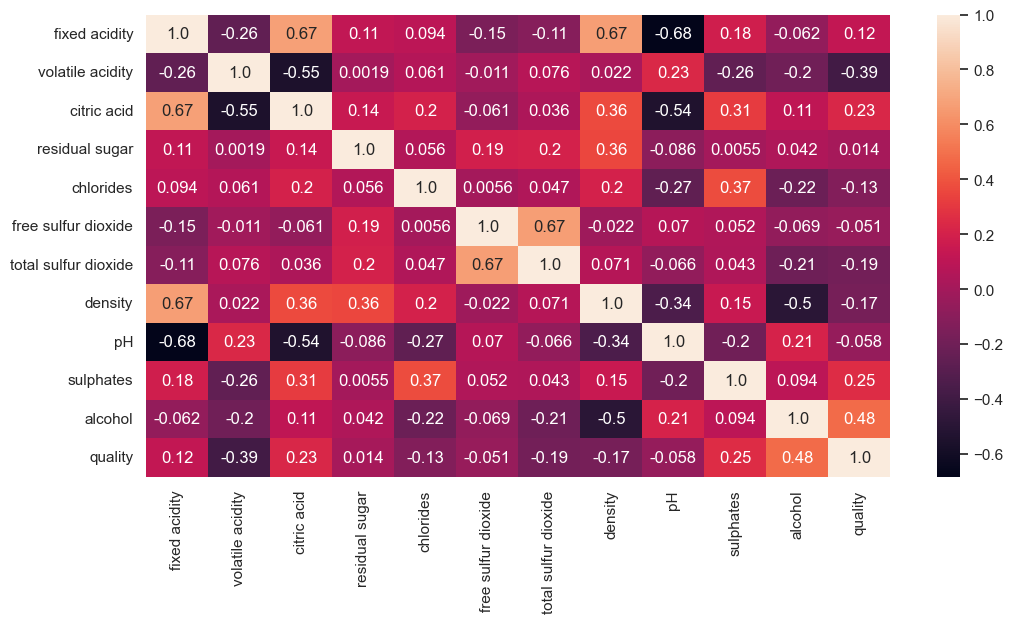

In [100]:
# Создаём матрицу корреляции признаков
corr_matrix = wine_data.corr()

# Визуализируем полученную матрицу
fig = plt.figure(figsize=(12, 6))

sns.heatmap(corr_matrix, annot=True, fmt='.2');

Из полученной матрицы мы видим, что:

* Наши выводы, полученные на этапе анализа связи предикторов и итоговой оценки вина оказались верны, не смотря на то, что некоторые признаки имеют меньшую степень корреляции, чем можно было предположить в подэтапе ранее.

* Нет необходимости в удалении каких либо признаков из списка для обучения — некоторые признаки имеют очень слабый показатель корреляции с нашей целевой переменной, но они в свою очередь имеют прямую взаимосвязь с другими обучающими признаками, помимо очевидной, как например признаки `'fixed acidity'` и `'density'`.

Этап визуализации можно подводить к концу и переходить к этапам предобработки данных и последующего обучения, и оценки моделей.

# Предобработка данных перед обучением

Перед тем, как передавать предикторы и целевой признак на обучение нашим моделям их необходимо предобработать следующим образом, согласно полученным выводам на начальном этапе:

* Нам необходимо закодировать целевую переменную в соответствии с категориями качества:

<center>

`Плохие вина` (категория 0): значения признака `'quality'` < 6.5

`Хорошие вина` (категория 1): значения признака `'quality'` > 6.5

</center>

* Стандартизировать обучающие признаки в виду их разного диапазона значений.

Начнём по порядку — с целевой переменной:

In [101]:
# Кодируем признак по оговорённым условиям
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x > 6.5 else 0)

# Проверяем конечный результат
wine_data['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

Как мы можем видеть, в наших данных преобладают вина с оценкой качества менее 6.5 баллов, это прямой сигнал о том, что наши обучающие и тестовые выборки нужно будет стратифицировать по целевой переменной.

Теперь, обработаем обучающие предикторы.

Воспользуемся методом стандартизации, чтобы признаки имели одинаковый диапазон значений:

In [102]:
# Создаём объект класса StandardScaler
scaler = StandardScaler()

# Создаём список столбцов для последующей обработке
col_for_scaler = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                  'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                  'pH', 'sulphates', 'alcohol']

# Применяем стандартизатор с явно указанными столбцами
wine_data[col_for_scaler] = scaler.fit_transform(wine_data[col_for_scaler])

# Проверяем полученный датасет на успешность предобработки
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0


Наши обучающие предикторы успешно предобработались, теперь, они имеют одинаковый диапазон значений, а целевая переменная имеет лишь две категории — 0 для плохих вин и 1 для хороших.

Можем смело переходить к обучению и оценке моделей.

# SVC-модель

## Базовая модель

Перед тем, как обучать модель, разделим данные на обучающие и тестовые выборки:

In [103]:
# Задаём предикторы и целевую переменную
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Разбиваем данные на выборки (не забывая и о стратификации)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Проверим размерности выборок
print(f'Размерность выборок: {X_train.shape}, {X_test.shape}')

Размерность выборок: (1119, 11), (480, 11)


Начнём с базовой *SVM*-модели с ядром радиальной базисной функции. Мы не будем явно указывать параметры и оценим результат целевой метрики модели «из коробки»:

In [104]:
# Создаём и обучаем базовую модель
base_model = SVC(random_state=42)
base_model.fit(X_train, y_train)

# Делаем предсказание на тестовой выборке
y_pred = base_model.predict(X_test)

# Записываем результат целевой метрики оценки качества
base_model_res = accuracy_score(y_test, y_pred)

# Проверяем результата метрики
print(f'Accuracy-score базовой модели: {base_model_res :.4}')

Accuracy-score базовой модели: 0.9042


Наша базовая модель уже сейчас делаем отличные прогнозы имея меньше четверти доли неверных предсказаний.

Попытаемся улучшить этот показатель, путём подбора её гиперпараметров.

## Модель с подобранными гиперпараметрами

Для более тонкой настройки модели, мы воспользуемся методом случайного поиска по заданному распределению гиперпараметров:

In [107]:
# Задаём диапазон значений для C, gamma и kernel
C_range = np.logspace(-2, 4, 7)
gamma_range = np.logspace(-4, 1, 6)
kernel_range = ['linear', 'poly', 'rbf', 'sigmoid']

# Создаём словарь с заготовленными диапазонами значений
param_distributions = {'C': (C_range),
                       'gamma': (gamma_range),
                       'kernel' : (kernel_range)}

# Дополнительно воспользуемся кросс-валидацией на 5 фолдах
cv = cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

# Создаём объект класса RandomizedSearchCV с вышеперечисленными параметрами
random_search = RandomizedSearchCV(estimator=SVC(random_state=42),
                                   param_distributions=param_distributions,
                                   cv=cv,
                                   scoring='accuracy',
                                   return_train_score=True)

# Обучаем наш метод подбора гиперпараметров
random_search.fit(X_train, y_train)

,estimator,SVC(random_state=42)
,param_distributions,"{'C': array([1.e-02...e+03, 1.e+04]), 'gamma': array([1.e-04...e+00, 1.e+01]), 'kernel': ['linear', 'poly', ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedShu...ain_size=None)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


Метод обучен, оценим результаты точности при обучении, чтобы убедиться в отсутствии переобучения моделей:

In [109]:
# Получаем значения тренировочных результатов
train_scores = random_search.cv_results_['mean_train_score']

# Выводим полученные значения точности
print(train_scores)

[1.         0.90804598 0.86462324 0.86462324 1.         0.86462324
 0.86462324 0.86462324 0.86462324 0.86462324]


Из полученного списка результатов обучения мы видим, что у нас имеются две модели с переобучением. Чтобы убедиться в том, что их гиперпараметры не будут предложены нам как 'лучшие' выведем их значения для сравнения:

In [122]:
# Получаем значения тестовых результатов
test_scores = random_search.cv_results_['mean_test_score']

# Проходимся циклом по параметрам для всех моделей
for i, params in enumerate(random_search.cv_results_['params']):
    if train_scores[i] == 1.000: # Находим модели с переобучением и выводим информацию о них
        print(f'Модель {i}: train_score = {train_scores[i] :.4f}, test_score = {test_scores[i] :.4f}')
        print(f'Гиперпараметры: {params}')
        print()

Модель 0: train_score = 1.0000, test_score = 0.7958
Гиперпараметры: {'kernel': 'poly', 'gamma': np.float64(1.0), 'C': np.float64(100.0)}

Модель 4: train_score = 1.0000, test_score = 0.7958
Гиперпараметры: {'kernel': 'poly', 'gamma': np.float64(10.0), 'C': np.float64(0.1)}



Теперь, когда мы знаем параметры переобученных моделей, посмотрим на наилучшие из найденных параметров:

In [116]:
# Выводим значения лучших найденных параметров
print(f'Лучшие найденные параметры: {random_search.best_params_}')

Лучшие найденные параметры: {'kernel': 'poly', 'gamma': np.float64(0.1), 'C': np.float64(1.0)}


Предложенные гиперпараметры не соответствуют ни одной из переобученных моделей, следовательно, мы можем смело использовать их при обучении новой *SVM*-модели.

Обучим новую модель на подобранных гиперпараметрах и оценим её точность: 

In [119]:
# Создаём и обучаем новую модель
new_model = SVC(C=1.0, gamma=0.1, kernel='poly')
new_model.fit(X_train, y_train)

# Делаем предсказание на тестовой выборке
y_pred = new_model.predict(X_test)

# Записываем результат целевой метрики оценки качества
new_model_res = accuracy_score(y_test, y_pred)

# Проверяем результата метрики
print(f'Accuracy-score новой модели: {new_model_res :.4}')

Accuracy-score новой модели: 0.8833


Как мы можем видеть, подобранные гиперпараметры не улучшили результаты предсказания, а наоборот ухудшили. В таком случае предпочтение в выборе модели *SVM* мы отдадим базовой модели.

# Итоговый выбор модели

К сожалению, метод подбора гиперпараметров не дал ожидаемых результатов, и настроенная модель не смогла улучшить результаты предсказания категории вина базовой *SVM*-модели.

Точность настроенной модели оказалась хуже, а потому мы выберем *SVM*-модель с базовыми параметрами как наше алгоритмическое нёбо.